# **ML в бизнесе : Выбор локации для скважины**

## **Импорт и предобработка данных**
Загрузите и подготовьте данные. Поясните порядок действий.

**Импорт библиотек и настройки**

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy import stats as st

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Импорт данных**

In [103]:
# список заданной длины под импорт данных по регионам
regions_amount = 3
data = [None] * regions_amount

In [104]:
# импорт данных по регионам в цикле
for i in range(regions_amount):
    print('\n', '-'*100, f'\nИмпорт данных по региону {i}:\n')
    try:
        data[i] = pd.read_csv(f'/datasets/geo_data_{i}.csv') # путь к данным для сетевой версии
    except: 
        data[i] = pd.read_csv(f'datasets/geo_data_{i}.csv')  # путь к данным для локальной версии
    data[i].info()
    print(data[i].describe())
    print('\n')
    display(data[i].head())


 ---------------------------------------------------------------------------------------------------- 
Импорт данных по региону 0:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252  

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



 ---------------------------------------------------------------------------------------------------- 
Импорт данных по региону 1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172  

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



 ---------------------------------------------------------------------------------------------------- 
Импорт данных по региону 2:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482  

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**Проверка на мультиколлинеарность**


 ---------------------------------------------------------------------------------------------------- 
Корреляция признаков в регионе 0:

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000


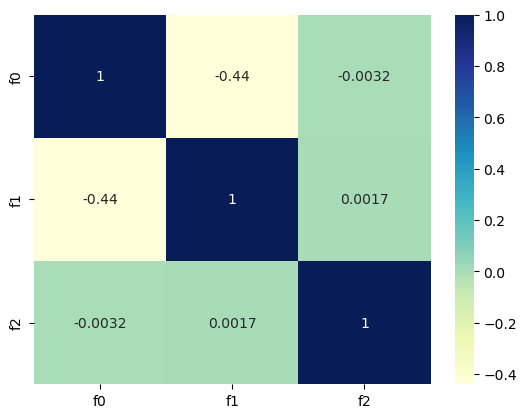


 ---------------------------------------------------------------------------------------------------- 
Корреляция признаков в регионе 1:

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000


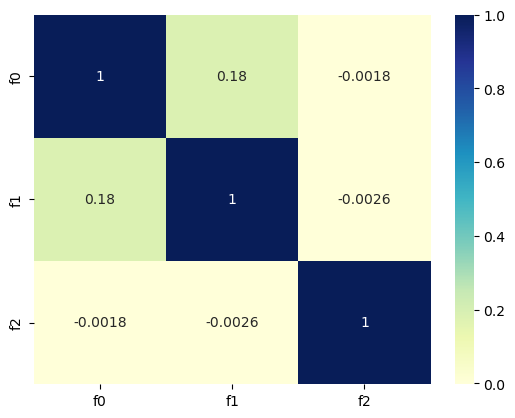


 ---------------------------------------------------------------------------------------------------- 
Корреляция признаков в регионе 2:

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


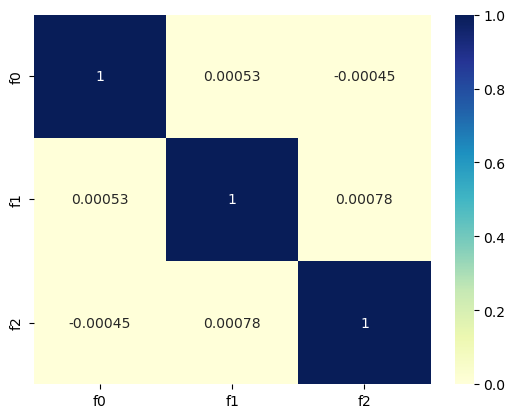

In [105]:
for i in range(regions_amount):
    print('\n', '-'*100, f'\nКорреляция признаков в регионе {i}:\n')
    print(data[i].corr())
    
     # нарисуем heatmap
    df_plot = sns.heatmap(data[i].drop(['product'], axis=1).corr(), cmap="YlGnBu", annot=True )  
    plt.show()
 

Ввиду незначительной корреляции признаков между собой, делаем вывод, что проблемы мультиколлинеарности в исходных данных нет.

**Проверка на дубликаты**

In [106]:
for i in range(regions_amount):
    print('Дубликатов регион',i,':', data[i].duplicated().sum())

Дубликатов регион 0 : 0
Дубликатов регион 1 : 0
Дубликатов регион 2 : 0


### Промежуточные выводы ###

- Данные импортированы без проблем. 
- Пропусков данных нет
- Формат названий столбов соответствуют стандартам
- Дубликатов в данных не обнаружено
- Формат данных не требует изменений 
- Проверка корреляции признаков не выявила мультиколлинеарности
---

## **Обучение и проверка моделей**

**Подготовка данных для обучения**

В диапазоне есть данные, не нужные для обучения моделей, а именно - уникальный идентификатор скважины. Обозначим идентификатор как индекс dataframe.

In [107]:
for i in range(regions_amount):
    #data[i].set_index('id', inplace=True)
    data[i] = data[i].drop(['id'], axis=1)

**Обучение моделей**

In [108]:
# создадим необходимые переменные
features_train = [None] * regions_amount # набор обучающих признаков для [региона]
features_valid = [None] * regions_amount # набор валидационных признаков для [региона]
target_train = [None] * regions_amount # целевые значения обучающей выборки для [региона]
target_valid = [None] * regions_amount # целевые значения валидационной выборки для [региона]

model = [None] * regions_amount # предсказательная модель для [региона]
predictions_valid = [None] * regions_amount # предсказания на валидационных признаках для [региона]

In [109]:
# разбивка данных в цикле
for i in range(regions_amount):
    features = data[i].drop(['product'], axis=1) 
    target = data[i]['product'] 

    features_train[i], features_valid[i], target_train[i], target_valid[i] = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    print(f'Shape обучающих данных региона {i}:', features_train[i].shape, ', валидационных:', features_valid[i].shape)

Shape обучающих данных региона 0: (75000, 3) , валидационных: (25000, 3)
Shape обучающих данных региона 1: (75000, 3) , валидационных: (25000, 3)
Shape обучающих данных региона 2: (75000, 3) , валидационных: (25000, 3)


**Скалирование признаков**

In [110]:
# проведем скалирование числовых признаков
numeric = ['f0', 'f1', 'f2']

for i in range(regions_amount):
    scaler = StandardScaler()
    #настраиваем скалер на обучающей выборке
    scaler.fit(features_train[i][numeric])
    # масштабируем признаки обучающей и валидационной выборок
    features_train[i][numeric] = scaler.transform(features_train[i][numeric])
    features_valid[i][numeric] = scaler.transform(features_valid[i][numeric])
 

In [111]:
# обучение моделей в цикле
for i in range(regions_amount):
    model[i] = LinearRegression() # создаем модель
    model[i].fit(features_train[i], target_train[i]) # обучаем модель
    predictions_valid[i] = pd.Series(model[i].predict(features_valid[i])) # получаем предсказания модели на валидационных данных
    predictions_valid[i].index = features_valid[i].index # сохраним индексы

**Результаты предсказаний**

In [112]:
graph_data = []
for i in range(regions_amount):
    MSE = mean_squared_error(target_valid[i], predictions_valid[i])
    RMSE = MSE ** 0.5
    predicted_mean = predictions_valid[i].mean()
    print(f'Регион {i}:')
    print('Средний предсказанный запас:', predicted_mean)
    print('Root Mean Square Error (RMSE):', RMSE, '\n')
    graph_data.append([f'Прогноз регион {i}', predicted_mean, RMSE]) # сохраним значения для графика

Регион 0:
Средний предсказанный запас: 92.59256778438005
Root Mean Square Error (RMSE): 37.5794217150813 

Регион 1:
Средний предсказанный запас: 68.72854689544583
Root Mean Square Error (RMSE): 0.8930992867756182 

Регион 2:
Средний предсказанный запас: 94.96504596800509
Root Mean Square Error (RMSE): 40.02970873393434 



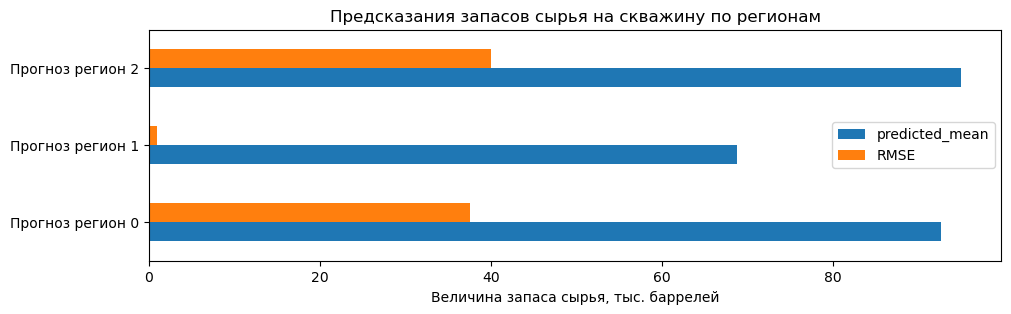

In [113]:
# отобразим результаты на графике
graph_data = pd.DataFrame.from_records(graph_data, columns=['region', 'predicted_mean','RMSE'])

graph_data.plot(kind='barh', x='region', figsize=(11,3), stacked=False)
plt.xlabel("Величина запаса сырья, тыс. баррелей")
plt.ylabel("" )
plt.title("Предсказания запасов сырья на скважину по регионам")
plt.legend(loc="right")

plt.show()

### Промежуточные выводы

Для каждого региона получили средний предсказанный запас сырья на скважину и корень среднеквадратического отклонения прогноза расчетной модели. 

Согласно расчетной модели самый богатый - `регион 2` с 95 тыс.баррелей , почти такие же значения получились по `региону 0`. 
Самые скромные значения у `региона 1`, 68,7 тыс. баррелей

Однако, для `региона 0` и `региона 2` модели выдают значительную величину RMSE, на уровне 37-40 тыс.баррелей, т.е. в указанных регионах наблюдается значительная нестабильность по запасам в похожих по параметрам f0, f1, f2 скважинах. 

Для `региона 1` значение RMSE меньше 1 тыс. баррелей, что говорит о возможности очень точного прогнозирования в рамках данного региона.

---

## **Подготовка к расчету прибыли**

In [114]:
# создадим переменные со значениями согласно условиям задания
EXPLORE_AMOUNT = 500
DRILL_AMOUNT = 200
TOTAL_BUDGET = 10_000_000_000
PRODUCT_PROFIT = 450_000
MAX_LOSS_PROBA = 0.025

In [115]:
# расчет достаточного объема сырья для разработки новой скважины
# знаем величину бюджета (10 млрд.) =  наши расходы
# объем сырья со скважины * прибыль с единицы объема * 200 скважин  = наши доходы
# достаточный объем сырья = бюджет / 200 скважин / прибыль с единицы объема
product_minimum = TOTAL_BUDGET / DRILL_AMOUNT / PRODUCT_PROFIT

graph_data.append(['Точка безубыточности', product_minimum, 0]) # сохраним значения для графика

print('Достаточный объём сырья для безубыточной разработки новой скважины = %0.1f' % product_minimum ,'тыс. баррелей')
for i in range(regions_amount):
    print(f'Средний запас региона {i}:', data[i]['product'].mean())    

Достаточный объём сырья для безубыточной разработки новой скважины = 111.1 тыс. баррелей
Средний запас региона 0: 92.49999999999974
Средний запас региона 1: 68.82500000002561
Средний запас региона 2: 95.00000000000041


### Промежуточные выводы
Подсчитали достаточный объем сырья на скважину, для безубыточного бурения. Она составляет **111 тыс. баррелей.**
Средний запас на скважину в каждом из регионов ниже, однако в регионе 0 и 2 средний запас достаточно близок к точке безубыточного бурения. 92 и 95 тыс. баррелей соответственно.
Скважины в регионе 1 в среднем беднее, чуть менее 69 тыс. баррелей.

Среднее во всех регионах нижее точки безубыточности. Нельзя случайным образом выбирать скважины для разработки, такой подход с великой вероятностью обернется убытками.

---

## **Функция для расчета прибыли**

In [116]:
# функция для расчета прибыли
def predict_profit(target, predicted_product, count):
    predicted_product_sorted = predicted_product.sort_values(ascending=False) # сортируем прогноз объема сырья по убыванию
    sweetspots = target[predicted_product_sorted.index][:count] # выбираем самые богатые скважины в количестве count
    total_product = sum(sweetspots) # суммарный запас по самым богатым скважинам
    total_profit = total_product * PRODUCT_PROFIT - TOTAL_BUDGET # суммарная прибыль
    return total_profit


## **Расчет рисков и прибыли для каждого региона**

In [117]:
for i in range(regions_amount):
    state = np.random.RandomState(12345) # задаем исходное зерно для генератора случайных чисел
    values = [] # значения прибыли с каждой итерации bootstrap
    
    # 1000 выборок bootstrap
    for j in range(1000): 
        # набираем 500 (EXPLORE_AMOUNT) случайных скважин
        target_subsample = target_valid[i].sample(EXPLORE_AMOUNT, replace=True, random_state = state) 
        predictions_subsample = predictions_valid[i][target_subsample.index]  
        values.append(predict_profit(target_subsample, predictions_subsample, DRILL_AMOUNT)) #считаем прибыль

    values = pd.Series(values)
    mean = values.mean()
      
    #confidence_interval =  st.t.interval(0.95, len(values)-1, loc=values.mean(), scale=values.sem()) 
    confidence_interval =  st.norm.interval(alpha=0.95, loc=np.mean(values), scale=st.sem(values))
    
    # риск получить убытки - количество выборок с отрицательной прибылью (прибыль меньше бюджета) к общему кол-ву выборок
    losses_prob = len(values[values < 0]) / len(values)
    
    print(f'\nРегион {i}')
    print(f'Средняя прибыль = {mean: ,.0f}')
    print('95%-ый доверительный интервал:', confidence_interval)
    print('Вероятность убытков (прибыль меньше затраченного бюджета): %0.2f' % (losses_prob*100), '%' )



Регион 0
Средняя прибыль =  425,938,527
95%-ый доверительный интервал: (408753053.40125215, 443124000.41993237)
Вероятность убытков (прибыль меньше затраченного бюджета): 6.00 %

Регион 1
Средняя прибыль =  515,222,773
95%-ый доверительный интервал: (501637954.84049785, 528807592.04612803)
Вероятность убытков (прибыль меньше затраченного бюджета): 1.00 %

Регион 2
Средняя прибыль =  435,008,363
95%-ый доверительный интервал: (417474820.5883807, 452541904.97713244)
Вероятность убытков (прибыль меньше затраченного бюджета): 6.40 %


### Промежуточные выводы
- Провели оценку предполагаемой прибыли в разных регионах техникой bootstrap. 
- Во всех регионах средняя ожидаемая величина прибыли превышает бюджет 10 маллиардов.
- Проведенная оценка рисков показывает, что в регионах 0 и 2 риск превышает целевой (2,5%), согласно условиям задания от этих регионов откажемся.
- Остается только `регион 1`, в котором приемлемый риск получить убыток (1%). При этом данный регион имеет наибольшую ожидаемую прибыль.
- Для разраболтки скважин рекомендуется **Регион 1**

---

## **Общий вывод**

**Импорт данных**
- Данные импортированы без проблем.
- Пропусков данных нет
- Формат названий столбов соответствуют стандартам
- Дубликатов в данных не обнаружено
- Формат данных не требует изменений
- Данные не имеют проблемы мультиколлениарности

**Обучение и проверка моделей**
- Для каждого региона получили средний предсказанный запас сырья на скважину и корень среднеквадратического отклонения прогноза расчетной модели.
- Согласно расчетной модели самый богатый - регион 2 с 95 тыс.баррелей , почти такие же значения получились по региону 0. 
- Самые скромные значения у региона 1 - 68,7 тыс. баррелей
- Региона 0 и региона 2 имеют значительную величину RMSE, на уровне 37-40 тыс.баррелей, т.е. в указанных регионах наблюдается значительная нестабильность по запасам в похожих по параметрам f0, f1, f2 скважинах.
- Для региона 1 значение RMSE меньше 1 тыс. баррелей - величины запасов хорошо прогнозируемы

**Подготовка к расчету прибыли**
- Достаточный объем сырья на скважину, для безубыточного бурения равен 111 тыс. баррелей. 
- Среднее во всех регионах нижее точки безубыточности. Нельзя случайным образом выбирать скважины для разработки, такой подход с великой вероятностью обернется убытками

**Расчет прибыли и рисков**
- Провели оценку предполагаемой прибыли в разных регионах техникой bootstrap.
- Во всех регионах средняя ожидаемая величина прибыли превышает бюджет 10 маллиардов.
- Проведенная оценка рисков показывает, что в регионах 0 и 2 риск превышает целевой (2,5%), согласно условиям задания от этих регионов откажемся.
- Остается только регион 1, в котором приемлемый риск получить убыток (1%). При этом данный регион имеет наибольшую ожидаемую прибыль.
- Для разработки скважин **рекомендуется Регион 1**